<a href="https://colab.research.google.com/github/rafiquezia/NLP/blob/main/Sentiment_in_headlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the dataset**

In [2]:
import json

# Specify the path to your JSON file
json_file_path = "/content/Sarcasm_Headlines_Dataset_v2.json"

data = []

# Read the JSON file line by line
with open(json_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            item = json.loads(line)
            data.append(item)
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON: {e}")

In [4]:
#type of data imported
type(data)

list

In [3]:
#coverting data into dataframe
import pandas as pd

df = pd.DataFrame(data)

In [102]:
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [5]:
df['is_sarcastic'].value_counts()


0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [10]:

sentences = df['headline']
labels = df['is_sarcastic']
labels.shape
print(f'hed: {sentences[0:5]} klab: {labels[0:5]}')

hed: 0    thirtysomething scientists unveil doomsday clo...
1    dem rep. totally nails why congress is falling...
2    eat your veggies: 9 deliciously different recipes
3    inclement weather prevents liar from getting t...
4    mother comes pretty close to using word 'strea...
Name: headline, dtype: object klab: 0    1
1    0
2    0
3    1
4    1
Name: is_sarcastic, dtype: int64


**Data Preprocessing**

In [18]:
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [19]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [20]:
#Spliting data into test and train
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [21]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

**Model**

In [22]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
625/625 - 4s - loss: 0.6496 - accuracy: 0.6224 - val_loss: 0.5177 - val_accuracy: 0.7710 - 4s/epoch - 7ms/step
Epoch 2/10
625/625 - 2s - loss: 0.3999 - accuracy: 0.8394 - val_loss: 0.3649 - val_accuracy: 0.8442 - 2s/epoch - 4ms/step
Epoch 3/10
625/625 - 2s - loss: 0.3025 - accuracy: 0.8788 - val_loss: 0.3384 - val_accuracy: 0.8546 - 2s/epoch - 3ms/step
Epoch 4/10
625/625 - 2s - loss: 0.2524 - accuracy: 0.9014 - val_loss: 0.3322 - val_accuracy: 0.8573 - 2s/epoch - 3ms/step
Epoch 5/10
625/625 - 2s - loss: 0.2174 - accuracy: 0.9176 - val_loss: 0.3378 - val_accuracy: 0.8518 - 2s/epoch - 4ms/step
Epoch 6/10
625/625 - 3s - loss: 0.1899 - accuracy: 0.9295 - val_loss: 0.3540 - val_accuracy: 0.8450 - 3s/epoch - 4ms/step
Epoch 7/10
625/625 - 3s - loss: 0.1688 - accuracy: 0.9380 - val_loss: 0.3645 - val_accuracy: 0.8470 - 3s/epoch - 4ms/step
Epoch 8/10
625/625 - 2s - loss: 0.1499 - accuracy: 0.9460 - val_loss: 0.4016 - val_accuracy: 0.8402 - 2s/epoch - 4ms/step
Epoch 9/10
625/625 - 2s 

**Predictions**

In [25]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing is canceled due to death of a mouse"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 81ms/step
[[0.4356119 ]
 [0.08523436]]


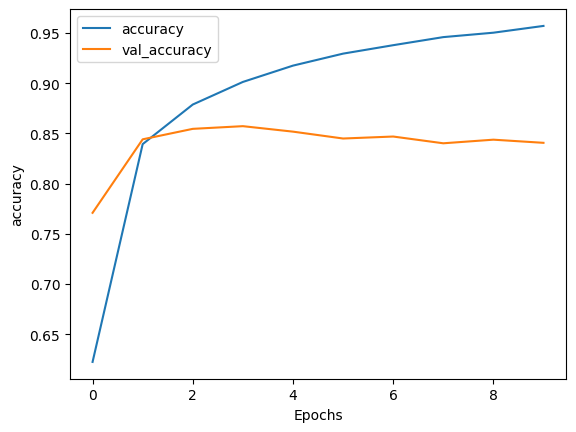

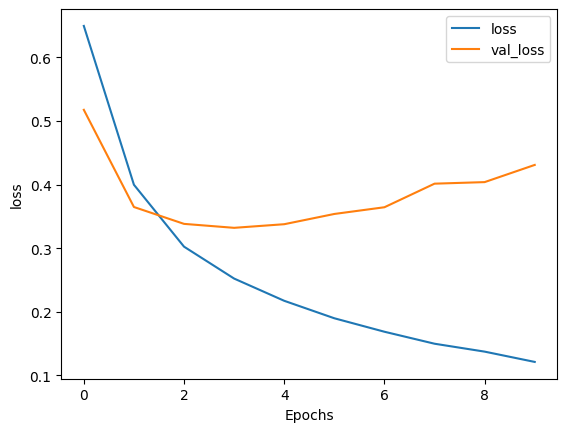

In [26]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")